In this lab I demonstrate what I have learned from nvidia Deep Learning Institute's free introduction to neural networks. 

A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. Deep learning is a type of neural network interconnect neurons in a structure of layers resembling the human brain. Lets embed from youtube a video talking about neural networks and the human brain.

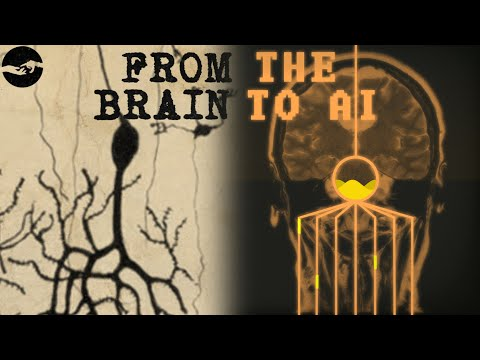

In [73]:
from IPython.display import YouTubeVideo
video_source = 'g08A2wiqlxA'
video = YouTubeVideo(video_source)
video

Neural netwroks involves huge matrices manpulation. use Google's tensorflow tensorflow to check if the device has GPU capabilies. We can tensorflow's (list.physical_devices).

In [74]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

fashion-mnist is retail store dataset. we will try to build a simple artificial brain capable to classify images from this store. Lets use keras to call fashion_mnist dataset and do some operations on it.

In [75]:
fashion_mnist = tf.keras.datasets.fashion_mnist

We load fashion-mnist into our training data and testing data

In [76]:
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

to have a better sense of fashion_mnist we visualize a sample using image index. we need to import matplotlib library.

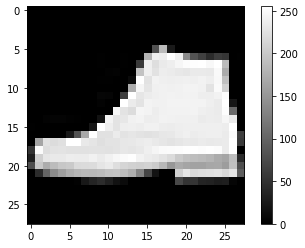

In [77]:
import matplotlib.pyplot as plt

# we can pick in index number provided that its within the dataset limits.
data_idx = 42

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
# we apply grding to our image, but for this lab we will set it to False.
plt.grid(False)
plt.show()

Fashion_mnist has 10 labeles ( T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot ). our artificial brain should recognize the image and tell what it is.

structure of validation data is as follows:

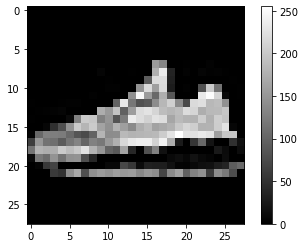

In [78]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

Each image is 28 pixles by 28 pixles. total weights is 784. where 0 is black and 255 is white.
if we check pixle values of the previews image we get this :

In [79]:
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Each number from the above structure will be assigned a weight.

But how do we make our artificial brain transform numbers into categories ?
to create a model we use keras. it's a deep learning framework integrated into tensorflow.

In [80]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

To verfy that our model has the expected struture we use summary method.

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


this shows that, the total count of parameters is 7850.

lets do  quick simple trick:
we know have 28 pixels by 28 pixels. lets do the math.

In [83]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

7850 - 7840 = 10 , those are the 10 neuron biases.

a nice alternative is to use keras's utility to plot our model.

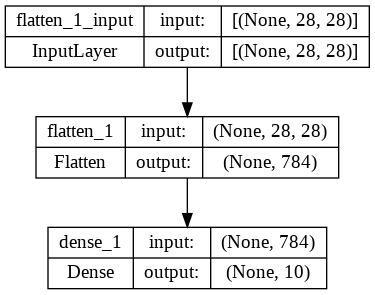

In [84]:
tf.keras.utils.plot_model(model, show_shapes=True)

the model is set up but we need to intiate the training! we need to measure our model performance. for that we use a function called Loss Function. Keras comes with a specific loss function called ( SparseCategoricalCrossentropy ). we are gonna use it for our demonstration in this lab.
we are gonna use some metric to monitor how well our model perform.

In [85]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Now it's time to evaluate our model, we can use fit method.

In [86]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 16.5316 - accuracy: 0.7450 - val_loss: 26.9922 - val_accuracy: 0.6757
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 12.3380 - accuracy: 0.7879 - val_loss: 14.9135 - val_accuracy: 0.7601
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 11.4427 - accuracy: 0.7961 - val_loss: 11.5796 - val_accuracy: 0.7901
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 11.1959 - accuracy: 0.7969 - val_loss: 11.7758 - val_accuracy: 0.8075
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 10.3582 - accuracy: 0.8055 - val_loss: 11.2877 - val_accuracy: 0.7869


as we see from above result, acuracy is no less that 80%. this is understood because we only used 10 neurons. in humans' brain billions of neurons!!

Now it's time to give our artifcial brain the job to predict!
to do that we use predict function, lets see the out put:

In [87]:
model.predict(train_images[0:10])

1/1 [==============================] - 0s 46ms/step


array([[ -343.3785   ,  -858.8989   ,  -323.1513   ,  -527.15424  ,
         -517.3052   ,   150.4443   ,  -210.89296  ,   287.13235  ,
           29.71361  ,   460.481    ],
       [  273.25342  ,  -467.78186  ,   171.08429  ,   159.52705  ,
         -132.21593  , -1387.4493   ,   247.55548  , -1837.4857   ,
         -197.017    ,  -944.9228   ],
       [   22.82163  ,   -72.980354 ,    10.03683  ,    49.44342  ,
           13.372042 ,  -631.6678   ,    21.534847 ,  -491.87784  ,
         -138.29398  ,  -365.80524  ],
       [  100.508865 ,   -29.031454 ,   139.8169   ,   190.5836   ,
           62.95669  ,  -815.4596   ,   153.98045  , -1057.5112   ,
         -170.49146  ,  -789.3044   ],
       [   44.578354 ,   -45.77905  ,    29.545666 ,   135.78864  ,
           88.63932  , -1145.4603   ,    64.71607  ,  -744.0624   ,
         -136.32886  ,  -930.47156  ],
       [   47.77475  ,  -193.51335  ,   274.29663  ,    -1.9297098,
          137.69102  ,  -941.9196   ,   133.47945  , -159

to interpret these numbers we need some formating. we display the image based on these numbers and also we grph the results of each neuron.

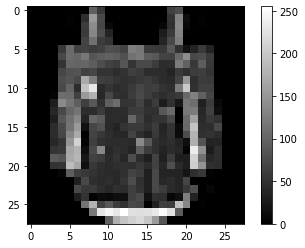

1/1 [==============================] - 0s 21ms/step


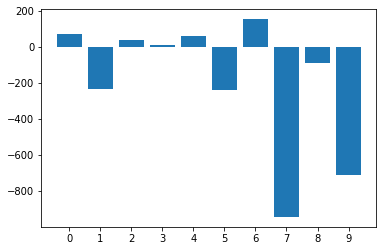

correct answer: 6


In [88]:
data_idx = 8675 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])

We're done! We created a simple articial brain. 
We learned alot through the process.

I would like to thank nvidia's Deep Learning Institute for offering this lab for free. 